# Predicting Bankruptcy Of Polish Companies Using Machine Learning

## Project description

The notebook uses multiple machine learning algortithms such as Logistic regression, random forest, XG boost, support vector machines, etc. to **predict the bankruptcy of Polish companies** based on financial predictors. The data was collected for the period 2007-2013 and credits go to Emerging Markets Information Service and Sebastian Tomczak from Department of Operations Research, Wroclaw University, Poland. The dataset contains all the financial features (all are numerical in nature) of the polish companies and the feature descriptions can be found in the link provided. The problem type is a binary class classification and each instance belongs to either bankrupt ('class 1') or Non-Bankrupt (calss 0).

The flow of the project follows 3 experimental settings and is as below:

- Reading the data in arff files.
- Target variable distribution analysis .
- Basic data exploration.
- Missing values treatment.
- Sampling (SMOTE & random), scaling and K-fold cross validation.
- Application of multiple classification algorithms based on different time horizons.
- Comparision of Recall scores on testing datasets.
- Result discussion.

**Notebook runtime:**<br>
**Dataset link :** https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# to read arff files
from scipy.io import arff

In [41]:
warnings.filterwarnings("ignore")

PATH = "C:/Users/dhema/Documents/"

In [7]:
# data loading of each of the firm-year data from each year into respective variables.
data_yr1 = arff.loadarff(PATH + "/data/1year.arff") # year 2007, class label that indicates bankruptcy status after 5 years.
data_yr2 = arff.loadarff(PATH + "/data/2year.arff") # year 2008, class label that indicates bankruptcy status after 4 year
data_yr3 = arff.loadarff(PATH + "/data/3year.arff") # year 2009, class label that indicates bankruptcy status after 3 year
data_yr4 = arff.loadarff(PATH + "/data/4year.arff") # year 2010, class label that indicates bankruptcy status after 2 year
data_yr5 = arff.loadarff(PATH + "/data/5year.arff") # year 2011, class label that indicates bankruptcy status after 1 year

In [8]:
data_yr1[0]

array([( 0.20055 , 0.37951,  0.39641, 2.0472 ,   32.351 , 0.38825 ,  0.24976 , 1.3305  , 1.1389 , 0.50494 , 0.24976 ,  0.6598  ,  0.1666  ,  0.24976 ,    497.42,  0.73378 , 2.6349,  0.24976 ,  0.14942 , 43.37  , 1.2479 , 0.21402 ,  0.11998 , 0.47706 , 0.50494 ,  0.60411 ,  1.4582 ,  1.7615 , 5.9443, 0.11788, 0.14942 ,  94.14 , 3.8772, 0.56393 ,  0.21402 , 1.741  , 5.9327e+02, 0.50591,  0.12804 , 0.66295 , 0.051402, 0.12804 , 114.42 ,  71.05 ,  1.0097  , 1.5225 ,  49.394 ,  0.1853  ,  0.11085 , 2.042  , 0.37854, 0.25792,  2.2437 ,  2.248  ,  3.4869e+05,  0.12196 ,  0.39718 , 0.87804, 1.9240e-03,  8.416 , 5.1372,  82.658, 4.4158,  7.4277 , b'0'),
       ( 0.20912 , 0.49988,  0.47225, 1.9447 ,   14.786 , 0.      ,  0.25834 , 0.99601 , 1.6996 , 0.49788 , 0.26114 ,  0.5168  ,  0.15835 ,  0.25834 ,    677.96,  0.53838 , 2.0005,  0.25834 ,  0.152   , 87.981 , 1.4293 , 0.24806 ,  0.12304 ,      nan, 0.39542 ,  0.43992 , 88.444  , 16.946  , 3.6884, 0.26969, 0.152   , 122.17 , 2.9876, 2.9876  , 

In [9]:
# .arff files into a ddataframe
data_yr1 = pd.DataFrame(data_yr1[0])
data_yr2 = pd.DataFrame(data_yr2[0])
data_yr3 = pd.DataFrame(data_yr3[0])
data_yr4 = pd.DataFrame(data_yr4[0])
data_yr5 = pd.DataFrame(data_yr5[0])
data_yr1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


The dataset contains 64 numerical predictor attributes and a class feature indicating bankrupt or not.

In [10]:
# Feature type count
data_yr1.dtypes.value_counts()

float64    64
object      1
dtype: int64

In [11]:
data_yr1.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


Features have different scales, for e.g. maximum value of Attr3 is 1 and for feature Attr64 is 294770. Hence, feature scaling is needed for the distance based algortihms to perform better.

### Target Variable Class Distribution

In [12]:
typ = data_yr1['class'].value_counts()
typ = typ.rename_axis('class').reset_index(name='ClassCounts')
typ

,class,ClassCounts
0,b'0',6756
1,b'1',271


In [13]:
data_yr2['class'].value_counts()

b'0'    9773
b'1'     400
Name: class, dtype: int64

In [14]:
data_yr3['class'].value_counts()

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [15]:
data_yr4['class'].value_counts()

b'0'    9277
b'1'     515
Name: class, dtype: int64

In [16]:
data_yr5['class'].value_counts()

b'0'    5500
b'1'     410
Name: class, dtype: int64

- Replacing the b'0' with class 0 and b'1' with 1

In [17]:
#Replacing the b'0' with class 0 and b'1' with 1
data_yr1['class'].replace({typ['class'][1]:1, typ['class'][0]:0}, inplace=True)
data_yr2['class'].replace({typ['class'][1]:1, typ['class'][0]:0}, inplace=True)
data_yr3['class'].replace({typ['class'][1]:1, typ['class'][0]:0}, inplace=True)
data_yr4['class'].replace({typ['class'][1]:1, typ['class'][0]:0}, inplace=True)
data_yr5['class'].replace({typ['class'][1]:1, typ['class'][0]:0}, inplace=True)
data_yr1['class'].value_counts()

0    6756
1     271
Name: class, dtype: int64

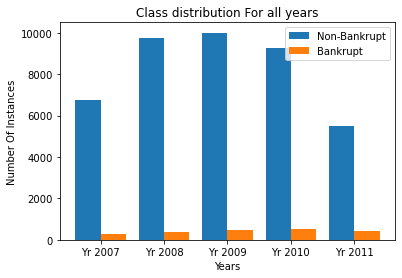

In [18]:
# Class distribution vizualization
years = ['Yr 2007','Yr 2008','Yr 2009','Yr 2010','Yr 2011']
class0 = [len(data_yr1[data_yr1['class']==0]['class']), len(data_yr2[data_yr2['class']==0]['class']),
          len(data_yr3[data_yr3['class']==0]['class']), len(data_yr4[data_yr4['class']==0]['class']),
         len(data_yr5[data_yr5['class']==0]['class'])]
class1 = [len(data_yr1[data_yr1['class']==1]['class']), len(data_yr2[data_yr2['class']==1]['class']),
          len(data_yr3[data_yr3['class']==1]['class']), len(data_yr4[data_yr4['class']==1]['class']),
         len(data_yr5[data_yr5['class']==1]['class'])]


X_axis = np.arange(len(years))

plt.bar(X_axis-0.2, class0, 0.4, label='Non-Bankrupt')
plt.bar(X_axis+0.2, class1, 0.4, label='Bankrupt')


plt.title("Class distribution For all years")
plt.xticks(X_axis,years)
plt.xlabel("Years")
plt.ylabel("Number Of Instances")
plt.legend()
plt.show()

It can be seen that we have an imbalanced dataset containing two classes - 'class 0'  which belong to Non-Bankrupt and 'class 1' belonging to bankrupt company. 

## Workflow

>The following cells provide data analysis, pre-processing steps, modelling on 3 datasets - **Experiment 1**: dataset from 2007 (data_yr1), **Experiment 2**: dataset from 2011 (data_yr5) and **Experiment 3**: concatenated dataset from 2007-2011 for comparision.


- In each of the seactions, the following steps will be performed in order to prepare the dataset for model training.
1. **Train & Test Splitting**: To avoid any data leakage.
2. **Missing value analysis**: Using the strategy 'mean', the missing values will be filled.
3. **Sampling**: Random oversampling Or SMOTE. 
4. **Rescaling**: Using min-max scaler
5. **Modelling & evaluation**

## Experiment 1
> Analysis & modelling on dataset from 2007 (data_yr1). The prediction horizon is 5 years meaning based on data available in 2007, the model will try to predict the bankruptcy of the firms in 2012

### 1.1 Train & Test Splitting

In [21]:
from sklearn.model_selection import train_test_split

In [16]:
# TO maintain consistency across dataframes we need the columns list.
cols = data_yr1.columns

In [17]:
# splitting data for the year 2007 (yr1)
y_yr1 = data_yr1['class']
X_yr1 = data_yr1.drop(columns= ['class']).copy()

X_train_yr1, X_test_yr1, y_train_yr1, y_test_yr1,  = train_test_split(X_yr1,y_yr1, train_size = 0.8, random_state=42 )

In [18]:
y_train_yr1.value_counts()

0    5401
1     220
Name: class, dtype: int64

### 1.2 Missing values analysis & handling

In [19]:
data_yr1_nan = pd.DataFrame(data_yr1.isnull().sum()).rename(columns={0:'total'})
data_yr1_nan['NaN_Percent'] = round(100*(data_yr1_nan['total']/data_yr1.shape[0]),2)
data_yr1_nan.sort_values('NaN_Percent',ascending= False ).head(6)

,total,NaN_Percent
Attr37,2740,38.99
Attr21,1622,23.08
Attr27,311,4.43
Attr60,135,1.92
Attr45,134,1.91
Attr24,124,1.76


Attribute 37 corresponds to [(current assets - inventories) / long-term liabilities] and Attribute 21 to [sales (n) / sales (n-1)] where 39% & 23% of the data is missing respectively. For this section we will proceed with keeping the feature and fill the values with mean of the column. However, this is not the case since such high missing value features are usually dropped altogether.

In [25]:
from sklearn.impute import SimpleImputer

In [21]:
# Filling the missing values with mean of the feature.
imputer = SimpleImputer(strategy = 'mean', missing_values=np.nan)
#imputer = imputer.fit(train_X_yr1)
X_train_yr1 = imputer.fit_transform(X_train_yr1)
X_test_yr1 = imputer.transform(X_test_yr1)


### 1.3 Sampling

Sampling is only done for the training data and prediction results are observerd on the testing data.

In [22]:
#!pip install imblearn

In [24]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [24]:
#SMOTE
smotesample = SMOTE(sampling_strategy='not majority') # all minority classes will be oversampled to match majority
X_train_yr1_smotesample, y_train_yr1_smotesample = smotesample.fit_resample(X_train_yr1, y_train_yr1)

In [25]:
#Randomoversampler
rand_sample = RandomOverSampler(sampling_strategy = 'minority')
X_train_yr1_randsample, y_train_yr1_randsample = rand_sample.fit_resample(X_train_yr1, y_train_yr1)

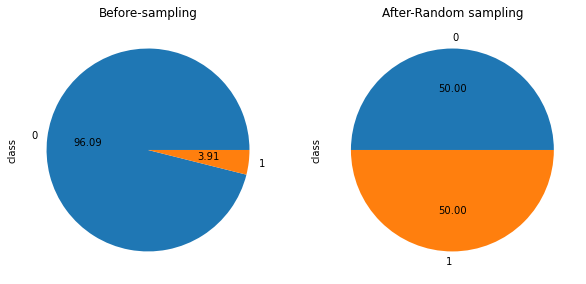

In [26]:
autopct = "%.2f"
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
y_train_yr1.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Before-sampling")

y_train_yr1_randsample.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("After-Random sampling")
#plt.title("Class distribution before & after sampling")
plt.show()

### 1.4 Normalization (Feature Scaling)

In [27]:
### Normalization of data ###
from sklearn.preprocessing import MinMaxScaler

FeatureScaler=MinMaxScaler()

# Storing the fit object for later reference
FeatureScalerFit_smote=FeatureScaler.fit(X_train_yr1_smotesample)
FeatureScalerFit_rand=FeatureScaler.fit(X_train_yr1_randsample)

# Generating the normalized values of Features
# Smote objects
X_train_yr1_smotesample= FeatureScalerFit_smote.transform(X_train_yr1_smotesample)
X_test_yr1_smotesample = FeatureScalerFit_smote.transform(X_test_yr1)

# Random oversampler objects
X_train_yr1_randsample= FeatureScalerFit_rand.transform(X_train_yr1_randsample)
X_test_yr1_randsample = FeatureScalerFit_rand.transform(X_test_yr1)

### 1.5 Modelling & Evaluation

> **Modeling**

- Logistic regression
- SVM
- Random Forest
- Gradient Boosting

> **Evaluation**

- Accuracy
- Precision
- Sensitivity (Important)

### Logistic Regression (LR)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Logistic Regression
cv = StratifiedKFold(n_splits=10, shuffle=False)
# choose parameter Penalty='l1' 'l2'
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
lr_param_grid = {'penalty':['l2','l1'],'solver':['newton-cg', 'lbfgs'] } # best parameters

lr = LogisticRegression()
LR_Grid = GridSearchCV(estimator=lr, param_grid = lr_param_grid, cv =cv )

In [30]:
# Model creation and prediction on SMOTE Data
LR_Grid.fit(X_train_yr1_smotesample,y_train_yr1_smotesample)
print("Best LR Parameters",LR_Grid.best_params_)
lr_clf = LR_Grid.best_estimator_
y_pred_lr=lr_clf.predict(X_test_yr1_smotesample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr1, y_pred_lr))

# Printing the Overall Accuracy of the model
LR_recall_Score_smote=metrics.recall_score(y_test_yr1, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(LR_recall_Score_smote,2))


Best LR Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.97      0.53      0.69      1355
           1       0.04      0.55      0.08        51

    accuracy                           0.53      1406
   macro avg       0.51      0.54      0.38      1406
weighted avg       0.94      0.53      0.66      1406

[[718 637]
 [ 23  28]]
Recall Score of the model on Testing Sample Data: 0.55


In [31]:
lr_rand = LogisticRegression()
LR_Grid_rand = GridSearchCV(estimator=lr_rand, param_grid = lr_param_grid, cv =cv )

In [32]:
# # Model creation and prediction on Randomoversampler Data
LR_Grid_rand.fit(X_train_yr1_randsample,y_train_yr1_randsample)
lr_clf_rand = LR_Grid_rand.best_estimator_
y_pred_lr=lr_clf_rand.predict(X_test_yr1_randsample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr1, y_pred_lr))

# Printing the Overall Accuracy of the model
LR_recall_Score_rand=metrics.recall_score(y_test_yr1, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(LR_recall_Score_rand,2))

              precision    recall  f1-score   support

           0       0.97      0.53      0.69      1355
           1       0.04      0.55      0.08        51

    accuracy                           0.53      1406
   macro avg       0.51      0.54      0.38      1406
weighted avg       0.94      0.53      0.67      1406

[[722 633]
 [ 23  28]]
Recall Score of the model on Testing Sample Data: 0.55


### SVM

In [33]:
from sklearn.svm import SVC

In [34]:
# Support Vector Machine

# choose different kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
svc_param_grid = {'kernel':['linear', 'rbf'], 'C':[1,10] } 

svc =  SVC(gamma='auto')
svc_grid = GridSearchCV(estimator=svc, param_grid = svc_param_grid, cv =cv )

In [35]:
# Model creation and prediction on SMOTE Data
svc_grid.fit(X_train_yr1_smotesample,y_train_yr1_smotesample)
print("Best SVC Parameters",LR_Grid.best_params_)
svc_clf = svc_grid.best_estimator_
y_pred_svc=svc_clf.predict(X_test_yr1_smotesample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr1, y_pred_lr))

# Printing the Overall Accuracy of the model
svc_recall_Score_smote=metrics.recall_score(y_test_yr1, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(svc_recall_Score_smote,2))


Best SVC Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.97      0.53      0.69      1355
           1       0.04      0.55      0.08        51

    accuracy                           0.53      1406
   macro avg       0.51      0.54      0.38      1406
weighted avg       0.94      0.53      0.67      1406

[[722 633]
 [ 23  28]]
Recall Score of the model on Testing Sample Data: 0.55


In [36]:
svc_rand = SVC(gamma='auto')
svc_grid_rand = GridSearchCV(estimator=svc_rand, param_grid = svc_param_grid, cv =cv )

In [37]:
# Model creation and prediction on Randomoversampler Data
svc_grid_rand.fit(X_train_yr1_randsample,y_train_yr1_randsample)
svc_clf_rand = svc_grid_rand.best_estimator_
y_pred_svc=svc_clf_rand.predict(X_test_yr1_randsample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_svc))
print(metrics.confusion_matrix(y_test_yr1, y_pred_svc))

# Printing the Overall Accuracy of the model
svc_recall_Score_rand=metrics.recall_score(y_test_yr1, y_pred_svc)
print('Recall Score of the model on Testing Sample Data:', round(svc_recall_Score_rand,2))

              precision    recall  f1-score   support

           0       0.97      0.50      0.66      1355
           1       0.04      0.61      0.08        51

    accuracy                           0.50      1406
   macro avg       0.51      0.55      0.37      1406
weighted avg       0.94      0.50      0.64      1406

[[676 679]
 [ 20  31]]
Recall Score of the model on Testing Sample Data: 0.61


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_param_grid = {'max_depth': [60], 'n_estimators': [500] # best Parameters
                #'n_estimators':[50,100,500,1000], 'max_depth':[40,60,80,100] # these were tried out and commented for fast run
                } 

rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
rf_grid = GridSearchCV(estimator=rf, param_grid = rf_param_grid, cv =cv )

In [40]:
# Model creation and prediction on SMOTE Data
rf_grid.fit(X_train_yr1_smotesample,y_train_yr1_smotesample)
print("Best rf Parameters",LR_Grid.best_params_)
rf_clf = rf_grid.best_estimator_
y_pred_rf=rf_clf.predict(X_test_yr1_smotesample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr1, y_pred_lr))

# Printing the Overall Accuracy of the model
rf_recall_Score_smote=metrics.recall_score(y_test_yr1, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(rf_recall_Score_smote,2))


Best rf Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.97      0.53      0.69      1355
           1       0.04      0.55      0.08        51

    accuracy                           0.53      1406
   macro avg       0.51      0.54      0.38      1406
weighted avg       0.94      0.53      0.67      1406

[[722 633]
 [ 23  28]]
Recall Score of the model on Testing Sample Data: 0.55


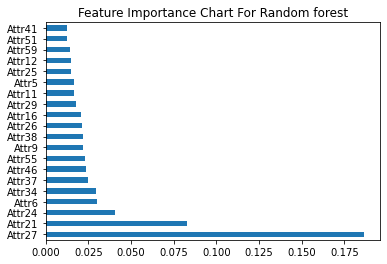

In [41]:
features = pd.Series(rf_clf.feature_importances_, index=X_yr1.columns)
features.nlargest(20).plot(kind='barh')
plt.title("Feature Importance Chart For Random forest")
plt.show()

From the above importance chart, Attr 27 [profit on operating activities / financial expenses] found to be most important by the model for predicting the bankruptcy.

In [42]:
rf_rand = RandomForestClassifier(n_jobs=-1, criterion='gini')
rf_grid_rand = GridSearchCV(estimator=rf_rand, param_grid = rf_param_grid, cv =cv )

In [43]:
# Model creation and prediction on Randomoversampler Data
rf_grid_rand.fit(X_train_yr1_randsample,y_train_yr1_randsample)
rf_clf_rand = rf_grid_rand.best_estimator_
y_pred_rf=rf_clf_rand.predict(X_test_yr1_randsample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_rf))
print(metrics.confusion_matrix(y_test_yr1, y_pred_rf))

# Printing the Overall Accuracy of the model
rf_recall_Score_rand=metrics.recall_score(y_test_yr1, y_pred_rf)
print('Recall Score of the model on Testing Sample Data:', round(rf_recall_Score_rand,2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1355
           1       1.00      0.43      0.60        51

    accuracy                           0.98      1406
   macro avg       0.99      0.72      0.80      1406
weighted avg       0.98      0.98      0.98      1406

[[1355    0]
 [  29   22]]
Recall Score of the model on Testing Sample Data: 0.43


#### XGBoost Classifier

In [44]:
#!pip install xgboost
from xgboost import XGBClassifier

In [45]:
xgb_param_grid = {#{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'} # best Parameters
                'n_estimators':[100], 'max_depth':[10],'objective':['binary:logistic'], 'booster':['gbtree'],
                'learning_rate':[0.1] 
                }
# these were tried out and commented for fast run
#'n_estimators':[50,75,100,200], 'max_depth':[5,10,20],'objective':['binary:logistic'], 'booster':['gbtree'],'learning_rate':[0.001,0.01,0.1,0.05]
xgb = XGBClassifier()
xgb_grid = GridSearchCV(estimator=xgb, param_grid = xgb_param_grid, cv =cv )

In [46]:
# Model creation and prediction on SMOTE Data
xgb_grid.fit(X_train_yr1_smotesample,y_train_yr1_smotesample)
print("Best xgb Parameters",LR_Grid.best_params_)
xgb_clf = xgb_grid.best_estimator_
y_pred_xgb=xgb_clf.predict(X_test_yr1_smotesample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr1, y_pred_lr))

# Printing the Overall Accuracy of the model
xgb_recall_Score_smote=metrics.recall_score(y_test_yr1, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(xgb_recall_Score_smote,2))


Best xgb Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.97      0.53      0.69      1355
           1       0.04      0.55      0.08        51

    accuracy                           0.53      1406
   macro avg       0.51      0.54      0.38      1406
weighted avg       0.94      0.53      0.67      1406

[[722 633]
 [ 23  28]]
Recall Score of the model on Testing Sample Data: 0.55


In [47]:
xgb_rand = XGBClassifier()
xgb_grid_rand = GridSearchCV(estimator=xgb_rand, param_grid = xgb_param_grid, cv =cv )

In [48]:
# Model creation and prediction on Randomoversampler Data
xgb_grid_rand.fit(X_train_yr1_randsample,y_train_yr1_randsample)
xgb_clf_rand = xgb_grid_rand.best_estimator_
y_pred_xgb=xgb_clf_rand.predict(X_test_yr1_randsample)

# Measuring accuracy on yr1 Testing Data
print(metrics.classification_report(y_test_yr1, y_pred_xgb))
print(metrics.confusion_matrix(y_test_yr1, y_pred_xgb))

# Printing the Overall Accuracy of the model
xgb_recall_Score_rand=metrics.recall_score(y_test_yr1, y_pred_xgb)
print('Recall Score of the model on Testing Sample Data:', round(xgb_recall_Score_rand,2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1355
           1       0.80      0.71      0.75        51

    accuracy                           0.98      1406
   macro avg       0.89      0.85      0.87      1406
weighted avg       0.98      0.98      0.98      1406

[[1346    9]
 [  15   36]]
Recall Score of the model on Testing Sample Data: 0.71


#### Evaluation

In [49]:
model_name_yr1= []
model_recall_scores_smote = []
model_recall_scores_rand = []

model_name_yr1.append('LogisticRegression')
model_recall_scores_smote.append(LR_recall_Score_smote)
model_recall_scores_rand.append(LR_recall_Score_rand)

model_name_yr1.append('SVM')
model_recall_scores_smote.append(svc_recall_Score_smote)
model_recall_scores_rand.append(svc_recall_Score_rand)

model_name_yr1.append('RandomForest')
model_recall_scores_smote.append(rf_recall_Score_smote)
model_recall_scores_rand.append(rf_recall_Score_rand)

model_name_yr1.append('XGBoost')
model_recall_scores_smote.append(xgb_recall_Score_smote)
model_recall_scores_rand.append(xgb_recall_Score_rand)


models_data_smote = pd.DataFrame({'Name':model_name_yr1,'Values':model_recall_scores_smote} )
models_data_rand = pd.DataFrame({'Name':model_name_yr1,'Values':model_recall_scores_rand} )

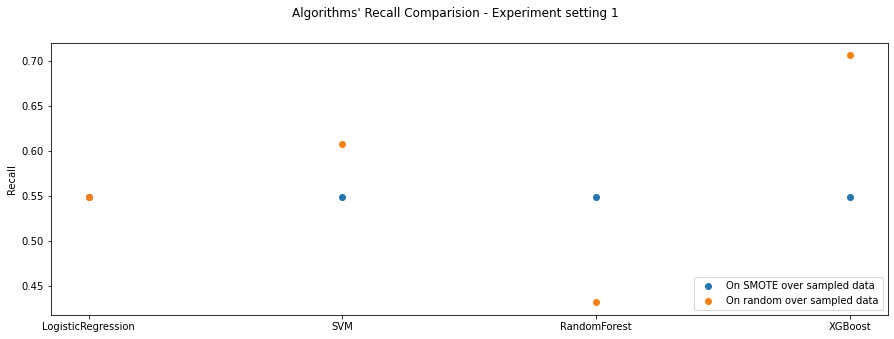

In [50]:
fig, axe = plt.subplots(figsize=(15,5))
plt.scatter(models_data_smote['Name'],models_data_smote['Values'],label='On SMOTE over sampled data')
plt.scatter(models_data_rand['Name'],models_data_rand['Values'],label='On random over sampled data')
plt.legend(loc="lower right")
plt.ylabel('Recall')
plt.suptitle("Algorithms' Recall Comparision - Experiment setting 1")
plt.show()

### Observations

- Random oversampling data has shown better results compared to data oversampled with SMOTE technique. Hence in the following sections, sampling will be done based on Randomoversampling technique and results will be compared with predictions on original dataset
- The modeling is based on the year 1 data, meaning the prediction time horizon is 5 years later. Based on year 2007 data we are trying to predict bankruptcy of firms in 2012. The following section combines all the data based on each firm-year and prediction horizon will be 1 year.

## Experiment 2

> Analysis & modelling on dataset from 2011 (data_yr5). The prediction horizon is 1 year meaning based on data available in 2011, the model will try to predict the bankruptcy of the firms in 2012.

#### Data Analysis

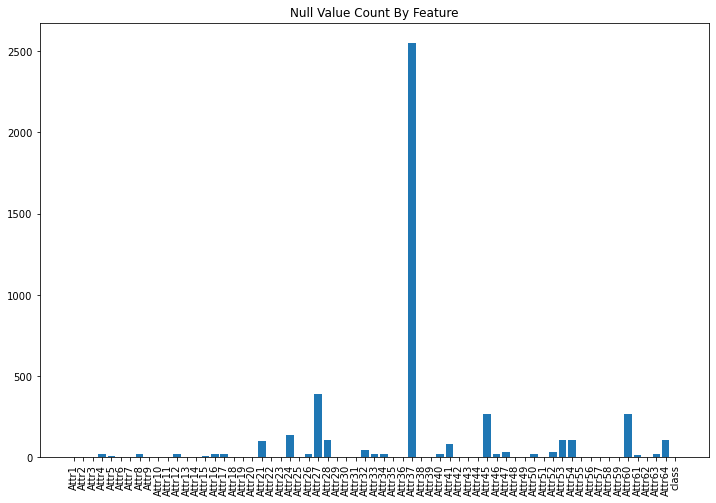

In [51]:
plt.figure(figsize=(12, 8))
plt.bar(cols, data_yr5.isna().sum())
plt.xticks(rotation=90)
plt.title("Null Value Count By Feature")
plt.show()

In [52]:
data_yr5_nan = pd.DataFrame(data_yr5.isnull().sum()).rename(columns={0:'total'})
data_yr5_nan['NaN_Percent'] = round(100*(data_yr5_nan['total']/data_yr5.shape[0]),2)
data_yr5_nan.sort_values('NaN_Percent',ascending= False ).head(6)

,total,NaN_Percent
Attr37,2548,43.11
Attr27,391,6.62
Attr45,268,4.53
Attr60,268,4.53
Attr24,135,2.28
Attr54,107,1.81


Attr37 contains 43% missing values. Hence we can drop this feature.

In [19]:
# making a copy before dropping columns
data_yr5_ = data_yr5.copy()
data_yr5_ = data_yr5_.drop(columns= ['Attr37'])
data_yr5_.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0


### 2.1 Train & Test Splitting

In [22]:
y_yr5 = data_yr5_['class']
X_yr5 = data_yr5_.drop(columns= ['class']).copy()

X_train_yr5, X_test_yr5, y_train_yr5, y_test_yr5,  = train_test_split(X_yr5,y_yr5, train_size = 0.8, random_state = 42 )

print('Observations in year 2011 training data: ',  len(y_train_yr5),'\n', pd.DataFrame(y_train_yr5).value_counts() )
print('Observations in year 2011 testing data: ',  len(y_test_yr5), '\n', pd.DataFrame(y_test_yr5).value_counts())

Observations in year 2011 training data:  4728 
 class
0        4408
1         320
dtype: int64
Observations in year 2011 testing data:  1182 
 class
0        1092
1          90
dtype: int64


### 2.2 Missing Value Imputation

In [26]:
imputer = SimpleImputer(strategy = 'mean', missing_values=np.nan)
#imputer = imputer.fit(train_X_yr1)
X_train_yr5 = imputer.fit_transform(X_train_yr5)
X_test_yr5 = imputer.transform(X_test_yr5)

### 2.3 Sampling

In [27]:
randomsampler = RandomOverSampler(sampling_strategy = 'minority') 
# majority strategy will remove the class 0 samples whihc results in loss of information.
X_train_yr5_rand, y_train_yr5_rand = randomsampler.fit_resample(X_train_yr5, y_train_yr5)

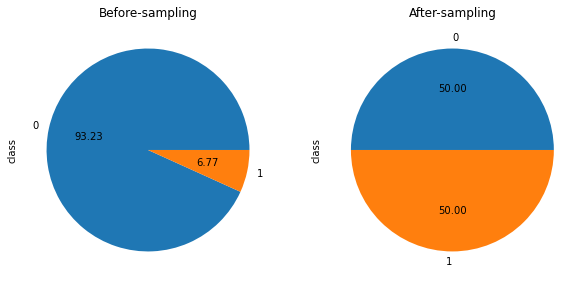

In [57]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
y_train_yr5.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Before-sampling")

y_train_yr5_rand.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("After-sampling")
#plt.title("Class distribution before & after sampling")
plt.show()

### 2.4 Feature Scaling (Min-Max Scaler)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
FeatureScaler=MinMaxScaler()

# Storing the fit object for later reference
FeatureScalerFit=FeatureScaler.fit(X_train_yr5)
FeatureScalerFit_rand=FeatureScaler.fit(X_train_yr5_rand)

# Generating the normalized values of Features

# Dataframe with Random oversampler objects
X_train_yr5_rand = FeatureScalerFit_rand.transform(X_train_yr5_rand)
X_test_yr5_rand = FeatureScalerFit_rand.transform(X_test_yr5)

# Dataframe Without sampling
X_train_yr5 = FeatureScalerFit.transform(X_train_yr5)
X_test_yr5 = FeatureScalerFit.transform(X_test_yr5)

### 2.5 Modelling & Evaluation

> **Modeling**

- Logistic regression
- SVM (linear & Radial)
- Random Forest
- Gradient Boosting
- Neural Networks

> **Evaluation**

- Accuracy
- Precision
- Sensitivity (Important)

In [39]:
def model(X_train, y_train,X_test,y_test, param, estimator, cv):
    #Gridsearch CV
    model_grid = GridSearchCV(estimator=estimator, param_grid = param, cv =cv )
    model_grid.fit(X_train, y_train)
    
    # best estimator
    print("Best model parameters",model_grid.best_params_)
    model_classifier = model_grid.best_estimator_
    #prediction
    y_pred = model_classifier.predict(X_test)
    #metrics
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    
    # Printing the Overall recall of the model
    recall_Score=recall_score(y_test, y_pred)
    print('Recall Score of the model on Testing Sample Data:', round(recall_Score,2))
    
    return (model_classifier,recall_Score)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
cv = StratifiedKFold(n_splits=10, shuffle=False)

In [32]:
rf_param_grid = {'max_depth': [60], 'n_estimators': [1000] # best Parameters
                #'n_estimators':[50,100,500,1000], 'max_depth':[40,60,80,100] # these were tried out and commented for fast run
                } 

rf = RandomForestClassifier(n_jobs=-1, criterion='gini')

In [40]:
rf_model, rf_recall_score = model(X_train_yr5_rand, y_train_yr5_rand , X_test_yr5_rand,y_test_yr5, rf_param_grid,rf,cv)

Best model parameters {'max_depth': 60, 'n_estimators': 1000}
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1092
           1       0.68      0.42      0.52        90

    accuracy                           0.94      1182
   macro avg       0.82      0.70      0.74      1182
weighted avg       0.93      0.94      0.93      1182

Confusion Matrix
[[1074   18]
 [  52   38]]
Recall Score of the model on Testing Sample Data: 0.42


In [36]:
rf_recall_score

0.45555555555555555

array([0.0133029 , 0.00946198, 0.01156912, 0.01106347, 0.00981251,
       0.01537382, 0.01410329, 0.00956894, 0.01262854, 0.00949846,
       0.01350839, 0.01300112, 0.02320004, 0.01536397, 0.01904516,
       0.02177122, 0.00956049, 0.01386654, 0.00990482, 0.01078666,
       0.03970343, 0.02907088, 0.01147871, 0.01919796, 0.01763998,
       0.02872308, 0.06242002, 0.01081062, 0.02055289, 0.00745116,
       0.0095496 , 0.00651095, 0.0066621 , 0.02072764, 0.05001864,
       0.00816199, 0.01565565, 0.04489192, 0.01118432, 0.03109799,
       0.03298241, 0.01443877, 0.0136346 , 0.00981123, 0.02688108,
       0.00974268, 0.01036748, 0.00818176, 0.00931891, 0.01064373,
       0.0067972 , 0.01031955, 0.01055151, 0.02187575, 0.01226037,
       0.00760426, 0.01106782, 0.00581708, 0.00888211, 0.01392967,
       0.00880486, 0.00904536, 0.00914084])

#### LR

In [59]:
# Logistic Regression

# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
lr_param_grid = {#'penalty':['l2','l1'],'solver':['newton-cg', 'lbfgs']
                 'penalty': ['l2'], 'solver': ['lbfgs']} # best parameters

lr = LogisticRegression()
LR_Grid = GridSearchCV(estimator=lr, param_grid = lr_param_grid, cv =cv )

In [60]:
# Creating the model on original training data
LR_Grid.fit(X_train_yr5,y_train_yr5)
print("Best LR Parameters",LR_Grid.best_params_)
lr_clf = LR_Grid.best_estimator_
y_pred_lr=lr_clf.predict(X_test_yr5)

# Measuring accuracy on original testing Data
print(metrics.classification_report(y_test_yr5, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr5, y_pred_lr))

# Printing the Overall Accuracy of the model
LR_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(LR_recall_Score_yr5,2))


Best LR Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1092
           1       0.00      0.00      0.00        90

    accuracy                           0.92      1182
   macro avg       0.46      0.50      0.48      1182
weighted avg       0.85      0.92      0.89      1182

[[1091    1]
 [  90    0]]
Recall Score of the model on Testing Sample Data: 0.0


In [61]:
# Logistic Regression for oversampled data

# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
lr_param_grid = {#'penalty':['l2','l1'],'solver':['newton-cg', 'lbfgs']
                 'penalty': ['l2'], 'solver': ['lbfgs']} # best parameters

lr_rand = LogisticRegression()
LR_rand_Grid = GridSearchCV(estimator=lr_rand, param_grid = lr_param_grid, cv =cv )

In [63]:
# Creating the model on oversampled training data
LR_Grid.fit(X_train_yr5_rand,y_train_yr5_rand)
print("Best LR Parameters",LR_Grid.best_params_)
lr_clf = LR_Grid.best_estimator_
y_pred_lr=lr_clf.predict(X_test_yr5_rand)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_lr))
print(metrics.confusion_matrix(y_test_yr5, y_pred_lr))

# Printing the Overall Accuracy of the model
LR_recall_Score_yr5_rand=metrics.recall_score(y_test_yr5, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(LR_recall_Score_yr5_rand,2))


Best LR Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      1092
           1       0.14      0.62      0.23        90

    accuracy                           0.68      1182
   macro avg       0.55      0.66      0.52      1182
weighted avg       0.89      0.68      0.76      1182

[[753 339]
 [ 34  56]]
Recall Score of the model on Testing Sample Data: 0.62


#### SVM (linear)

In [64]:
# Support Vector Machine

# choose different kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
svc_param_grid = {'kernel':['linear'], 'C':[1,10] } 

svc =  SVC(gamma='auto')
SVC_Grid = GridSearchCV(estimator=svc, param_grid = svc_param_grid, cv =cv )

In [65]:
# Creating the model on original Training Data
SVC_Grid.fit(X_train_yr5,y_train_yr5)
print("Best SVC Parameters",SVC_Grid.best_params_)
SVC_clf = SVC_Grid.best_estimator_
y_pred_SVC=SVC_clf.predict(X_test_yr5)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_SVC))
print(metrics.confusion_matrix(y_test_yr5, y_pred_SVC))

# Printing the Overall Accuracy of the model
SVC_lin_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_SVC)
print('Recall Score of the model on Testing Sample Data:', round(SVC_lin_recall_Score_yr5,2))


Best SVC Parameters {'C': 10, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1092
           1       0.50      0.02      0.04        90

    accuracy                           0.92      1182
   macro avg       0.71      0.51      0.50      1182
weighted avg       0.89      0.92      0.89      1182

[[1090    2]
 [  88    2]]
Recall Score of the model on Testing Sample Data: 0.02


In [66]:
# Creating the model on oversampled Training Data
SVC_Grid.fit(X_train_yr5_rand,y_train_yr5_rand)
print("Best SVC Parameters",SVC_Grid.best_params_)
SVC_clf = SVC_Grid.best_estimator_
y_pred_SVC=SVC_clf.predict(X_test_yr5_rand)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_SVC))
print(metrics.confusion_matrix(y_test_yr5, y_pred_SVC))

# Printing the Overall Accuracy of the model
SVC_lin_recall_Score_yr5_rand=metrics.recall_score(y_test_yr5, y_pred_SVC)
print('Recall Score of the model on Testing Sample Data:', round(SVC_lin_recall_Score_yr5_rand,2))


Best SVC Parameters {'C': 10, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1092
           1       0.24      0.69      0.35        90

    accuracy                           0.81      1182
   macro avg       0.60      0.75      0.62      1182
weighted avg       0.91      0.81      0.85      1182

[[894 198]
 [ 28  62]]
Recall Score of the model on Testing Sample Data: 0.69


#### SVM (Raadial Basis Function)

In [67]:
# Support Vector Machine

# choose different kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
svc_param_grid = {'kernel':['rbf'], 'C':[1,10] } 

svc =  SVC(gamma='auto')
SVC_Grid = GridSearchCV(estimator=svc, param_grid = svc_param_grid, cv =cv )

In [68]:
# Creating the model on original Training Data
SVC_Grid.fit(X_train_yr5,y_train_yr5)
print("Best SVC hyperparameters",SVC_Grid.best_params_)
SVC_clf = SVC_Grid.best_estimator_
y_pred_SVC=SVC_clf.predict(X_test_yr5)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_SVC))
print(metrics.confusion_matrix(y_test_yr5, y_pred_SVC))

# Printing the Overall Accuracy of the model
SVC_rbf_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_SVC)
print('Recall Score of the model on Testing Sample Data:', round(SVC_lin_recall_Score_yr5,2))


Best SVC hyperparameters {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1092
           1       0.00      0.00      0.00        90

    accuracy                           0.92      1182
   macro avg       0.46      0.50      0.48      1182
weighted avg       0.85      0.92      0.89      1182

[[1092    0]
 [  90    0]]
Recall Score of the model on Testing Sample Data: 0.02


In [69]:
# Creating the model on oversampled Training Data
SVC_Grid.fit(X_train_yr5_rand,y_train_yr5_rand)
print("Best SVC Parameters",SVC_Grid.best_params_)
SVC_clf = SVC_Grid.best_estimator_
y_pred_SVC=SVC_clf.predict(X_test_yr5_rand)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_SVC))
print(metrics.confusion_matrix(y_test_yr5, y_pred_SVC))

# Printing the Overall Accuracy of the model
SVC_rbf_recall_Score_yr5_rand=metrics.recall_score(y_test_yr5, y_pred_SVC)
print('Recall Score of the model on Testing Sample Data:', round(SVC_rbf_recall_Score_yr5_rand,2))


Best SVC Parameters {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      1092
           1       0.15      0.58      0.24        90

    accuracy                           0.71      1182
   macro avg       0.55      0.65      0.53      1182
weighted avg       0.89      0.71      0.78      1182

[[793 299]
 [ 38  52]]
Recall Score of the model on Testing Sample Data: 0.58


#### Random Forest

In [70]:
rf_param_grid = {'max_depth': [60], 'n_estimators': [1000] # best Parameters
                #'n_estimators':[50,100,500,1000], 'max_depth':[40,60,80,100] # these were tried out and commented for fast run
                } 

rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
RF_Grid = GridSearchCV(estimator=rf, param_grid = rf_param_grid, cv =cv )

In [71]:
# Creating the model on original Training Data
RF_Grid.fit(X_train_yr5,y_train_yr5)
print("Best RF Parameters",RF_Grid.best_params_)
RF_clf = RF_Grid.best_estimator_
y_pred_RF=RF_clf.predict(X_test_yr5)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_RF))
print(metrics.confusion_matrix(y_test_yr5, y_pred_RF))

# Printing the Overall Accuracy of the model
RF_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_RF)
print('Recall Score of the model on Testing Sample Data:', round(RF_recall_Score_yr5,2))

Best RF Parameters {'max_depth': 60, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1092
           1       0.75      0.49      0.59        90

    accuracy                           0.95      1182
   macro avg       0.85      0.74      0.78      1182
weighted avg       0.94      0.95      0.94      1182

[[1077   15]
 [  46   44]]
Recall Score of the model on Testing Sample Data: 0.49


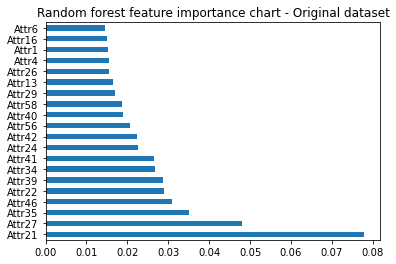

In [72]:
features = pd.Series(RF_clf.feature_importances_, index=X_yr5.columns)
features.nlargest(20).plot(kind='barh')
plt.title("Random forest feature importance chart - Original dataset")
plt.show()

In [73]:
# RF on over sampled data

RF_rand =  RandomForestClassifier(n_jobs=-1, criterion='gini')
RF_rand_Grid = GridSearchCV(estimator=RF_rand, param_grid = rf_param_grid, cv =cv )

In [74]:
# Creating the model on oversampled training data
RF_rand_Grid.fit(X_train_yr5_rand,y_train_yr5_rand)
print("Best RF_rand Parameters",RF_rand_Grid.best_params_)
RF_rand_clf = RF_rand_Grid.best_estimator_
y_pred_RF_rand=RF_rand_clf.predict(X_test_yr5_rand)

# Measuring accuracy on oversampled Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_RF_rand))
print(metrics.confusion_matrix(y_test_yr5, y_pred_RF_rand))

# Printing the Overall Accuracy of the model
RF_rand_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_RF_rand)
print('Recall Score of the model on Testing Sample Data:', round(RF_rand_recall_Score_yr5,2))

Best RF_rand Parameters {'max_depth': 60, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1092
           1       0.72      0.46      0.56        90

    accuracy                           0.95      1182
   macro avg       0.84      0.72      0.76      1182
weighted avg       0.94      0.95      0.94      1182

[[1076   16]
 [  49   41]]
Recall Score of the model on Testing Sample Data: 0.46


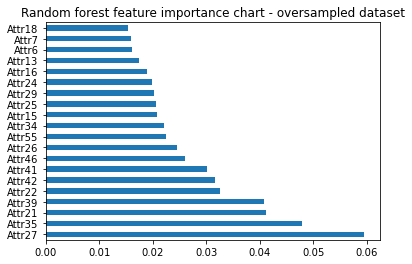

In [75]:
features = pd.Series(RF_rand_clf.feature_importances_, index=X_yr5.columns)
features.nlargest(20).plot(kind='barh')
plt.title("Random forest feature importance chart - oversampled dataset")
plt.show()

#### XGBoost

In [76]:
xgb_param_grid = {#{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'} # best Parameters
                'n_estimators':[100], 'max_depth':[10],'objective':['binary:logistic'], 'booster':['gbtree'],
                'learning_rate':[0.1] 
                } 
# these were tried out and commented for fast run
#'n_estimators':[50,75,100,200], 'max_depth':[5,10,20],'objective':['binary:logistic'], 'booster':['gbtree'],'learning_rate':[0.001,0.01,0.1,0.05]
xgb = XGBClassifier()
XGB_Grid = GridSearchCV(estimator=xgb, param_grid = xgb_param_grid, cv =cv )

In [77]:
# Creating the model on original Training Data
XGB_Grid.fit(X_train_yr5,y_train_yr5)
print("Best XGB Parameters",XGB_Grid.best_params_)
XGB_clf = XGB_Grid.best_estimator_
y_pred_XGB=XGB_clf.predict(X_test_yr5)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_XGB))
print(metrics.confusion_matrix(y_test_yr5, y_pred_XGB))

# Printing the Overall Accuracy of the model
XGB_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_XGB)
print('Recall Score of the model on Testing Sample Data:', round(XGB_recall_Score_yr5,2))

Best XGB Parameters {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1092
           1       0.85      0.61      0.71        90

    accuracy                           0.96      1182
   macro avg       0.91      0.80      0.84      1182
weighted avg       0.96      0.96      0.96      1182

[[1082   10]
 [  35   55]]
Recall Score of the model on Testing Sample Data: 0.61


In [78]:
# XGB on sampled data

xgb_rand = XGBClassifier()
XGB_rand_Grid = GridSearchCV(estimator=xgb_rand, param_grid = xgb_param_grid, cv =cv )

In [79]:
# Creating the model on oversampled training data
XGB_rand_Grid.fit(X_train_yr5_rand,y_train_yr5_rand)
print("Best XGB_rand Parameters",XGB_rand_Grid.best_params_)
XGB_rand_clf = XGB_rand_Grid.best_estimator_
y_pred_XGB_rand=XGB_rand_clf.predict(X_test_yr5_rand)

# Measuring accuracy on oversampled Testing Data
print(metrics.classification_report(y_test_yr5, y_pred_XGB_rand))
print(metrics.confusion_matrix(y_test_yr5, y_pred_XGB_rand))

# Printing the Overall Accuracy of the model
XGB_rand_recall_Score_yr5=metrics.recall_score(y_test_yr5, y_pred_XGB_rand)
print('Recall Score of the model on Testing Sample Data:', round(XGB_rand_recall_Score_yr5,2))

Best XGB_rand Parameters {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'}
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1092
           1       0.73      0.63      0.68        90

    accuracy                           0.95      1182
   macro avg       0.85      0.81      0.83      1182
weighted avg       0.95      0.95      0.95      1182

[[1071   21]
 [  33   57]]
Recall Score of the model on Testing Sample Data: 0.63


#### Evaluation

In [80]:
model_name_yr5= []
model_recall_scores_yr5 = []
model_recall_scores_yr5_rand = []

model_name_yr5.append('LogisticRegression')
model_recall_scores_yr5.append(LR_recall_Score_yr5)
model_recall_scores_yr5_rand.append(LR_recall_Score_yr5_rand)

model_name_yr5.append('SVM(lin)')
model_recall_scores_yr5.append(SVC_lin_recall_Score_yr5)
model_recall_scores_yr5_rand.append(SVC_lin_recall_Score_yr5_rand)

model_name_yr5.append('SVM(RBF)')
model_recall_scores_yr5.append(SVC_rbf_recall_Score_yr5)
model_recall_scores_yr5_rand.append(SVC_rbf_recall_Score_yr5_rand)

model_name_yr5.append('RandomForest')
model_recall_scores_yr5.append(RF_recall_Score_yr5)
model_recall_scores_yr5_rand.append(RF_rand_recall_Score_yr5)

model_name_yr5.append('XGBoost')
model_recall_scores_yr5.append(XGB_recall_Score_yr5)
model_recall_scores_yr5_rand.append(XGB_rand_recall_Score_yr5)


models_data_yr5 = pd.DataFrame({'Name':model_name_yr5,'Values':model_recall_scores_yr5} )
models_data_yr5_rand = pd.DataFrame({'Name':model_name_yr5,'Values':model_recall_scores_yr5_rand} )

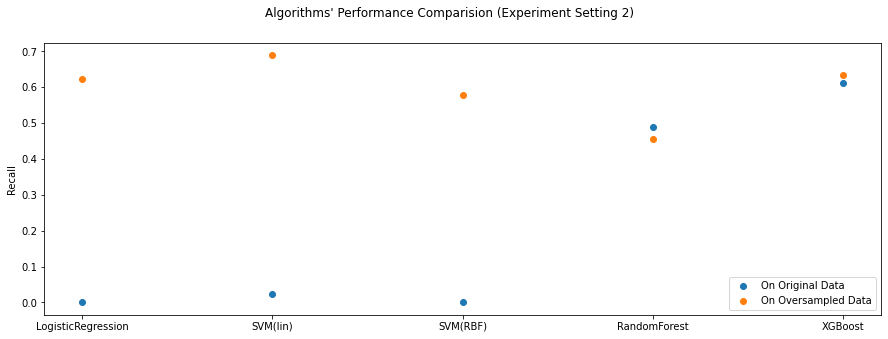

In [81]:
fig, axe = plt.subplots(figsize=(15,5))
plt.scatter(models_data_yr5['Name'],models_data_yr5['Values'],label='On Original Data')
plt.scatter(models_data_yr5_rand['Name'],models_data_yr5_rand['Values'],label='On Oversampled Data')
plt.legend(loc="lower right")
plt.ylabel('Recall')
plt.suptitle("Algorithms' Performance Comparision (Experiment Setting 2)")
plt.show()

## Experiment 3

> Analysis & modelling on dataset from 2007 till 2011. Based on the whole 5 year dataset, the model will try to predict the bankruptcy of the firms in 2012.

Like previous sections the following topics will be covered.

1. **Train & Test Splitting**: To avoid any data leakage.
2. **Missing value analysis**: Using the strategy 'mean', the missing values will be filled.
3. **Sampling**: Random oversampling Or SMOTE. 
4. **Rescaling**: Using min-max scaler
5. **Modelling & evaluation**

In [82]:
# concatenating all the yearly data into one dataframe
frames = [data_yr1[cols], data_yr2[cols], data_yr3[cols], data_yr4[cols], data_yr5[cols]]
data = pd.concat(frames)

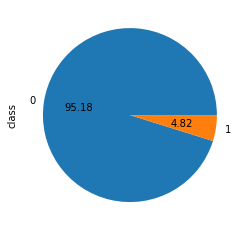

In [83]:
# Overall class distribution
data['class'].value_counts().plot.pie(autopct=autopct)
plt.show()

We have 41314 negative class observations and 2091 positive class observations. The following steps will be performed in order to prepare the dataset for model training.

### 3.1 Train & Test Splitting

In [84]:
# Modeling for 1 year prediction horizon
y = data['class']
X = data.drop(columns= ['class']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42 )

print('Observations in training data: ',  len(y_train),'\n', pd.DataFrame(y_train).value_counts() )
print('Observations in testing data: ',  len(y_test), '\n', pd.DataFrame(y_test).value_counts())

Observations in training data:  34724 
 class
0        33074
1         1650
dtype: int64
Observations in testing data:  8681 
 class
0        8240
1         441
dtype: int64


### 3.2 Missing Value Analysis

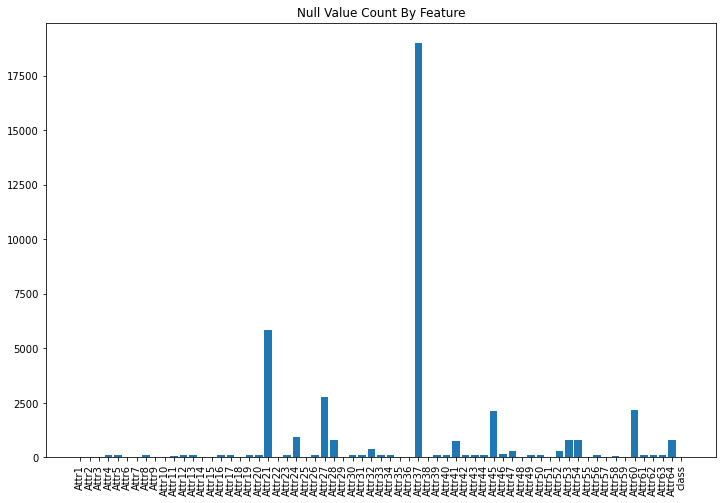

In [85]:
plt.figure(figsize=(12, 8))
plt.bar(cols, data.isna().sum())
plt.xticks(rotation=90)
plt.title("Null Value Count By Feature")
plt.show()

In [86]:
data_nan = pd.DataFrame(data.isnull().sum()).rename(columns={0:'total'})
data_nan['NaN_Percent'] = round(100*(data_nan['total']/data.shape[0]),2)
data_nan.sort_values('NaN_Percent',ascending= False ).head(6)

,total,NaN_Percent
Attr37,18984,43.74
Attr21,5854,13.49
Attr27,2764,6.37
Attr60,2152,4.96
Attr45,2147,4.95
Attr24,922,2.12


- As we can see, Attribute 37 contains ~ 44% of total data as missing values. Although the modeling on just the data for year 1 (data_yr1) has revealed that importance of this feature to be relevant, we must drop this feature. Imputation on this feature does not make much sense.

In [87]:
data = data.drop(columns= ['Attr37'])
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


#### Imputation

In [88]:
imputer = SimpleImputer(strategy = 'mean', missing_values=np.nan)
#imputer = imputer.fit(train_X_yr1)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### 3.3 Sampling

- The dataset we have is a higly imbalanced - with postive class instances of 1650 compared with negative class instances of 33074. In the following cells, random oversampler will be used to balance the dataset. At the same time, the original imbalanced data set will be kept for training and the respective models will be compared based on their performacne on the test data.

In [89]:
randomsampler = RandomOverSampler(sampling_strategy = 'minority') 
# majority strategy will remove the class 0 samples whihc results in loss of information.
X_train_rand, y_train_rand = randomsampler.fit_resample(X_train, y_train)

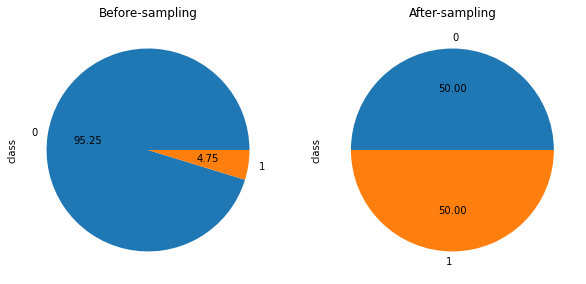

In [90]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
y_train.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Before-sampling")

y_train_rand.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("After-sampling")
#plt.title("Class distribution before & after sampling")
plt.show()

### 3.4 Feature Scaling (Min-Max Scaler)

In [91]:
FeatureScaler=MinMaxScaler()

# Storing the fit object for later reference
FeatureScalerFit=FeatureScaler.fit(X_train)
FeatureScalerFit_rand=FeatureScaler.fit(X_train_rand)

# Generating the normalized values of Features
# Dataframe with Random oversampler objects
X_train_rand = FeatureScalerFit_rand.transform(X_train_rand)
X_test_rand=FeatureScalerFit_rand.transform(X_test)

# Dataframe Without sampling
X_train = FeatureScalerFit.transform(X_train)
X_test=FeatureScalerFit.transform(X_test)



### 3.5 Modelling & Evaluation (On 5 Yr data)

> **Modeling**

- logistic regression
- SVM (linear & Radial)
- Random Forest
- Gradient Boosting
- Neural Networks

> **Evaluation**

- Accuracy
- Precision
- Sensitivity (Important)

#### LR

In [92]:
# Logistic Regression

# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
lr_param_grid = {#'penalty':['l2','l1'],'solver':['newton-cg', 'lbfgs']
                 'penalty': ['l2'], 'solver': ['lbfgs']} # best parameters

lr = LogisticRegression()
LR_Grid = GridSearchCV(estimator=lr, param_grid = lr_param_grid, cv =cv )

In [93]:
# Creating the model on oversampled and original training data
LR_Grid.fit(X_train,y_train)
print("Best LR hyperparameters",LR_Grid.best_params_)
lr_clf = LR_Grid.best_estimator_
y_pred_lr=lr_clf.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, y_pred_lr))
print(metrics.confusion_matrix(y_test, y_pred_lr))

# Printing the Overall Accuracy of the model
LR_recall_Score=metrics.recall_score(y_test, y_pred_lr)
print('Recall Score of the model on Testing Sample Data:', round(LR_recall_Score,2))


Best LR hyperparameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8240
           1       0.50      0.00      0.00       441

    accuracy                           0.95      8681
   macro avg       0.72      0.50      0.49      8681
weighted avg       0.93      0.95      0.92      8681

[[8239    1]
 [ 440    1]]
Recall Score of the model on Testing Sample Data: 0.0


In [94]:
# Logistic Regression

# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
lr_param_grid = {#'penalty':['l2','l1'],'solver':['newton-cg', 'lbfgs']
                 'penalty': ['l2'], 'solver': ['lbfgs']} # best parameters

lr_rand = LogisticRegression()
LR_rand_Grid = GridSearchCV(estimator=lr_rand, param_grid = lr_param_grid, cv =cv )

In [95]:
# Creating the model on oversampled and original training data
LR_rand_Grid.fit(X_train_rand,y_train_rand)
print("Best LR_rand Parameters",LR_rand_Grid.best_params_)
LR_rand_clf = LR_rand_Grid.best_estimator_
y_pred_LR_rand=LR_rand_clf.predict(X_test_rand)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, y_pred_LR_rand))
print(metrics.confusion_matrix(y_test, y_pred_LR_rand))

# Printing the Overall Accuracy of the model
LR_rand_recall_Score=metrics.recall_score(y_test, y_pred_LR_rand)
print('Recall Score of the model on Testing Sample Data:', round(LR_rand_recall_Score,2))


Best LR_rand Parameters {'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      8240
           1       0.07      0.56      0.12       441

    accuracy                           0.58      8681
   macro avg       0.51      0.57      0.42      8681
weighted avg       0.92      0.58      0.69      8681

[[4762 3478]
 [ 196  245]]
Recall Score of the model on Testing Sample Data: 0.56


#### SVM (Linear)

In [96]:
# Support Vector Machine

# choose different kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
svc_param_grid = {'kernel':['linear'], 'C':[1,10] } 

svc =  SVC(gamma='auto')
SVC_Grid = GridSearchCV(estimator=svc, param_grid = svc_param_grid, cv =cv )

In [97]:
# Creating the model on original Training Data
SVC_Grid.fit(X_train,y_train)
print("Best SVC linear hyperparameters",SVC_Grid.best_params_)
SVC_clf = SVC_Grid.best_estimator_
y_pred_SVC=SVC_clf.predict(X_test)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test, y_pred_SVC))
print(metrics.confusion_matrix(y_test, y_pred_SVC))

# Printing the Overall Accuracy of the model
SVC_lin_recall_Score=metrics.recall_score(y_test, y_pred_SVC)
print('Recall Score of the model on Testing Sample Data:', round(SVC_lin_recall_Score,2))

Best SVC linear hyperparameters {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8240
           1       0.00      0.00      0.00       441

    accuracy                           0.95      8681
   macro avg       0.47      0.50      0.49      8681
weighted avg       0.90      0.95      0.92      8681

[[8240    0]
 [ 441    0]]
Recall Score of the model on Testing Sample Data: 0.0


In [98]:
# SVC on over sampled data
svc_rand =  SVC(gamma='auto')
SVC_rand_Grid = GridSearchCV(estimator=svc_rand, param_grid = svc_param_grid, cv =cv )

> **Note** : The below cell takes forever to run because SVM's performace is really bad when run on large datasets. Hence it was marked down so that the notebook finishes faster for evaluation. A dummy recall score is assigned for the notebook to finish successfully.

In [99]:
SVC_lin_rand_recall_Score = 0

#### SVM (RBF)

In [100]:
# Support Vector Machine

# choose different kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
svc_param_grid = {'kernel':['rbf'], 'C':[1,10] } 

svc =  SVC(gamma='auto')
SVC_Grid = GridSearchCV(estimator=svc, param_grid = svc_param_grid, cv =cv )

In [101]:
# Creating the model on original Training Data
SVC_Grid.fit(X_train,y_train)
print("Best SVC RBF hyperparameters",SVC_Grid.best_params_)
SVC_clf = SVC_Grid.best_estimator_
y_pred_SVC=SVC_clf.predict(X_test)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test, y_pred_SVC))
print(metrics.confusion_matrix(y_test, y_pred_SVC))

# Printing the Overall Accuracy of the model
SVC_rbf_recall_Score=metrics.recall_score(y_test, y_pred_SVC)
print('Recall Score of the model on Testing Sample Data:', round(SVC_rbf_recall_Score,2))

Best SVC RBF hyperparameters {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8240
           1       0.00      0.00      0.00       441

    accuracy                           0.95      8681
   macro avg       0.47      0.50      0.49      8681
weighted avg       0.90      0.95      0.92      8681

[[8240    0]
 [ 441    0]]
Recall Score of the model on Testing Sample Data: 0.0


In [102]:
# SVC on over sampled data
svc_rand =  SVC(gamma='auto')
SVC_rand_Grid = GridSearchCV(estimator=svc_rand, param_grid = svc_param_grid, cv =cv )

> **Note** : The below cell takes forever to run because SVM's performace is really bad when run on large datasets. Hence it was marked down so that the notebook finishes faster for evaluation. A dummy recall score is assigned for the notebook to finish successfully.

In [103]:
SVC_rbf_rand_recall_Score = 0

#### Random Forest

In [104]:
rf_param_grid = {'max_depth': [60], 'n_estimators': [500] # best Parameters
                #'n_estimators':[50,100,500,1000], 'max_depth':[40,60,80,100] # these were tried out and commented for fast run
                } 

rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
RF_Grid = GridSearchCV(estimator=rf, param_grid = rf_param_grid, cv =cv )


In [105]:
# Creating the model on original Training Data
RF_Grid.fit(X_train,y_train)
print("Best RF Parameters",RF_Grid.best_params_)
RF_clf = RF_Grid.best_estimator_
y_pred_RF=RF_clf.predict(X_test)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test, y_pred_RF))
print(metrics.confusion_matrix(y_test, y_pred_RF))

# Printing the Overall Accuracy of the model
RF_recall_Score=metrics.recall_score(y_test, y_pred_RF)
print('Recall Score of the model on Testing Sample Data:', round(RF_recall_Score,2))


Best RF Parameters {'max_depth': 60, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8240
           1       0.80      0.30      0.43       441

    accuracy                           0.96      8681
   macro avg       0.88      0.65      0.71      8681
weighted avg       0.96      0.96      0.95      8681

[[8206   34]
 [ 309  132]]
Recall Score of the model on Testing Sample Data: 0.3


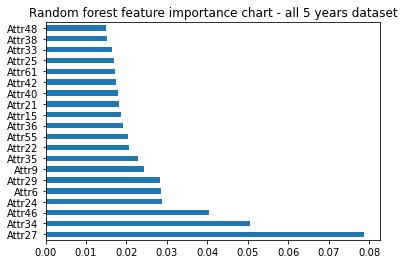

In [106]:
features = pd.Series(RF_clf.feature_importances_, index=X.columns)
features.nlargest(20).plot(kind='barh')
plt.title("Random forest feature importance chart - all 5 years dataset")
plt.show()

In [107]:
# RF on over sampled data
RF_rand =  RandomForestClassifier(n_jobs=-1, criterion='gini')
RF_rand_Grid = GridSearchCV(estimator=RF_rand, param_grid = rf_param_grid, cv =cv )

In [108]:
# Creating the model on oversampled training data
RF_rand_Grid.fit(X_train_rand,y_train_rand)
print("Best RF_rand Parameters",RF_rand_Grid.best_params_)
RF_rand_clf = RF_rand_Grid.best_estimator_
y_pred_RF_rand=RF_rand_clf.predict(X_test_rand)

# Measuring accuracy on oversampled Testing Data
print(metrics.classification_report(y_test, y_pred_RF_rand))
print(metrics.confusion_matrix(y_test, y_pred_RF_rand))

# Printing the Overall Accuracy of the model
RF_rand_recall_Score=metrics.recall_score(y_test, y_pred_RF_rand)
print('Recall Score of the model on Testing Sample Data:', round(RF_rand_recall_Score,2))


Best RF_rand Parameters {'max_depth': 60, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8240
           1       0.74      0.32      0.44       441

    accuracy                           0.96      8681
   macro avg       0.85      0.65      0.71      8681
weighted avg       0.95      0.96      0.95      8681

[[8191   49]
 [ 302  139]]
Recall Score of the model on Testing Sample Data: 0.32


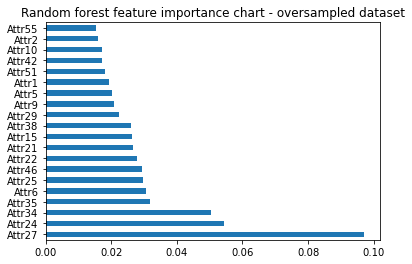

In [109]:
features = pd.Series(RF_rand_clf.feature_importances_, index=X.columns)
features.nlargest(20).plot(kind='barh')
plt.title("Random forest feature importance chart - oversampled dataset")
plt.show()

#### XGBoost

In [110]:
xgb_param_grid = {#{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'} # best Parameters
                'n_estimators':[100], 'max_depth':[10],'objective':['binary:logistic'], 'booster':['gbtree'],
                'learning_rate':[0.1] 
                } 
# these were tried out and commented for fast run
#'n_estimators':[50,75,100,200], 'max_depth':[5,10,20],'objective':['binary:logistic'], 'booster':['gbtree'],'learning_rate':[0.001,0.01,0.1,0.05]
xgb = XGBClassifier()
XGB_Grid = GridSearchCV(estimator=xgb, param_grid = xgb_param_grid, cv =cv )


In [111]:
# Creating the model on original Training Data
XGB_Grid.fit(X_train,y_train)
print("Best XGB Parameters",XGB_Grid.best_params_)
XGB_clf = XGB_Grid.best_estimator_
y_pred_XGB=XGB_clf.predict(X_test)

# Measuring accuracy on original Testing Data
print(metrics.classification_report(y_test, y_pred_XGB))
print(metrics.confusion_matrix(y_test, y_pred_XGB))

# Printing the Overall Accuracy of the model
XGB_recall_Score=metrics.recall_score(y_test, y_pred_XGB)
print('Recall Score of the model on Testing Sample Data:', round(XGB_recall_Score,2))


Best XGB Parameters {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.95      0.54      0.69       441

    accuracy                           0.98      8681
   macro avg       0.96      0.77      0.84      8681
weighted avg       0.97      0.98      0.97      8681

[[8227   13]
 [ 203  238]]
Recall Score of the model on Testing Sample Data: 0.54


In [112]:
# XGB on sampled data

xgb_rand = XGBClassifier()
XGB_rand_Grid = GridSearchCV(estimator=xgb_rand, param_grid = xgb_param_grid, cv =cv )

In [113]:
# Creating the model on oversampled training data
XGB_rand_Grid.fit(X_train_rand,y_train_rand)
print("Best XGB_rand Parameters",XGB_rand_Grid.best_params_)
XGB_rand_clf = XGB_rand_Grid.best_estimator_
y_pred_XGB_rand=XGB_rand_clf.predict(X_test_rand)

# Measuring accuracy on oversampled Testing Data
print(metrics.classification_report(y_test, y_pred_XGB_rand))
print(metrics.confusion_matrix(y_test, y_pred_XGB_rand))

# Printing the Overall Accuracy of the model
XGB_rand_recall_Score=metrics.recall_score(y_test, y_pred_XGB_rand)
print('Recall Score of the model on Testing Sample Data:', round(XGB_rand_recall_Score,2))


Best XGB_rand Parameters {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'binary:logistic'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8240
           1       0.80      0.63      0.71       441

    accuracy                           0.97      8681
   macro avg       0.89      0.81      0.85      8681
weighted avg       0.97      0.97      0.97      8681

[[8171   69]
 [ 162  279]]
Recall Score of the model on Testing Sample Data: 0.63


#### Evaluation

In [114]:
model_name= []
model_recall_scores = []
model_recall_scores_rand = []

model_name.append('LogisticRegression')
model_recall_scores.append(LR_recall_Score)
model_recall_scores_rand.append(LR_rand_recall_Score)


model_name.append('SVM(lin)')
model_recall_scores.append(SVC_lin_recall_Score)
model_recall_scores_rand.append(SVC_lin_rand_recall_Score)

model_name.append('SVM(RBF)')
model_recall_scores.append(SVC_rbf_recall_Score)
model_recall_scores_rand.append(SVC_rbf_rand_recall_Score)

model_name.append('RandomForest')
model_recall_scores.append(RF_recall_Score)
model_recall_scores_rand.append(RF_rand_recall_Score)

model_name.append('XGBoost')
model_recall_scores.append(XGB_recall_Score)
model_recall_scores_rand.append(XGB_rand_recall_Score)


models_data = pd.DataFrame({'Name':model_name,'Values':model_recall_scores} )
models_data_rand = pd.DataFrame({'Name':model_name,'Values':model_recall_scores_rand} )

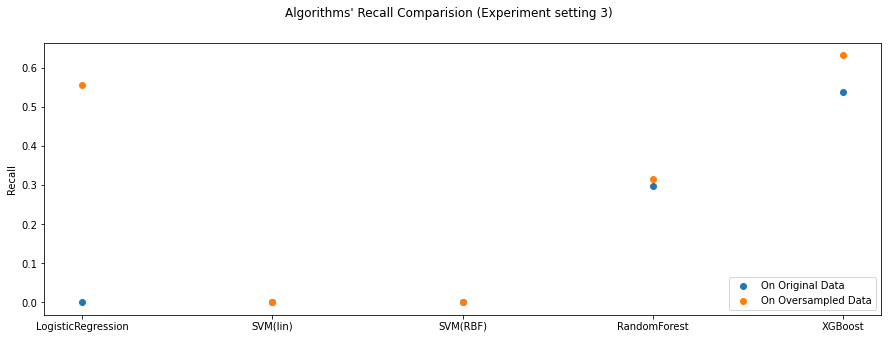

In [115]:
fig, axe = plt.subplots(figsize=(15,5))
plt.scatter(models_data['Name'],models_data['Values'],label='On Original Data')
plt.scatter(models_data_rand['Name'],models_data_rand['Values'],label='On Oversampled Data')
plt.legend(loc="lower right")
plt.ylabel('Recall')
plt.suptitle("Algorithms' Recall Comparision (Experiment setting 3)")
plt.show()

## Result Discussion

The dataset has large number of target class as Non-Bankrupt companies and very few companies going bankrupt each year. This resulted in an imbalanced dataset on whihc all of the algorithms struggled to perform.

1. **Train & Test Splitting**: 80/20 split was done before undertaking any kind of data transformations to avoid data leakage.
2. **Missing value analysis**: Features with missing value % more than 10% was dropped and imputations were done based on 'mean' strategy.
3. **Sampling**: Two sampling methods experimented were - SMOTE & Randomoversampling whihc generated sysnthetic minority class instances. The models performed better except for RF on the over sampled datasets across all prediction horizons (1 yr and 5 yr and all data).
4. **Rescaling**: Features had different scale and since some of the algorithms used distance based metrics for classification, min-max scaler was used to scale the data across features.
5. **Modelling**: 5 models were used such as Logistic regression, SVM (linear & RBF kernels), random forest, XG boost and adaptive boosting. Hyperparameter tuning was carried over using Gridsearch methodology. The best parameters were noted down and later replaced in the models for faster replication. 10-Fold crossvalidation was also used while training and models were evaluated based on their Recall scores for each of the 3 experimental settings - Year 1 data, Year 5 data and with all the data at once.

6. **Evaluation**: Since we have an imbalanced data set, all models gave high accuracy, but performed poor when predicting a ‘class 1'. Prediction of bankrupt(positive class) companies has more weight than wrongly predicting companies as bankrupt, hence **Recall**(True positive or sensitivity) metric was selected for visualization. Gradient boosting and random forest methods have performed best on original data (with class imbalance present) however on the oversampled data, LR and SVM had comparable recall. The performance of the models degraded when all the 5 years data was considered in comparision with just taking the 2011 year data.

7. **Challenges**: Support vector machines run time was very long on the concatenated dataset and it's oversampled version (> 44,000 instances) and this is becasue the training complexity of SVM is tied with the number of instances the dataset has. SVM kernels calculate distance between each point in the dataset and this is why it is not suggested to use SVMs for large datasets and hence they were omitted for the experimental setting 3.
It is not possible to accurately learn which company is performing poorly financially as there is no feature to identify any particular company to analyze it over the 5 year period. As mentioned in Feng Mai et al. 2019 and Theil et al. 2019 that leveraging natural language components such as earnings calls and yearly performance reports of companies can improve the models' predeiction performacne[**Reference below**]. Hence the dataset is limited to application of traditional ML methods in contrast to natural language models such as embedding models and LSTMs.

8. **COnclusion**: Performance of all the algorithms was better when predicting with 1 year time horizon (experiment setting 2) and performed poorly when predicting with 5 years time horizon. Meaning models could not generalize well or predict the bankruptcy for larger time horizons.

9. **Scope for improvment** : Neural networks were not implemented on this dataset which usually show better performance compared with traditional ML methods when there is large amount of data.

**Feng Mai et al. 2019** : https://www.sciencedirect.com/science/article/abs/pii/S0377221718308774
<br>
**Theil et al.2019** : https://www.ijcai.org/proceedings/2019/0724.pdf